# Project: Investigate a dataset - Gapminder 
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#part1">Part 1: Education</a></li>
<li><a href="#wrangling1">$\quad$Data Wrangling</a></li>
<li><a href="#eda1">$\quad$Exploratory Data Analysis</a></li>
<li><a href="#part2">Part 2: Employment </a></li>
<li><a href="#wrangling2">$\quad$Data Wrangling</a></li>
<li><a href="#eda2">$\quad$Exploratory Data Analysis</a></li>
<li><a href="#part3">Part 3: Political Representation</a></li>
<li><a href="#wrangling3">$\quad$Data Wrangling</a></li>
<li><a href="#eda3">$\quad$Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
The Gapminder dataset explores numerous attributes of people from all over the world, categorized by country and tracked all over the years. In my project, I focus on three indicators that relate to womens' issues: education, employment, and political representation. Each indicator is in its seperate csv file, although all three files share the same format: columns are the years and rows are the countries; each dataframe element is the value of the attribute for this country at this given year. 

### Question(s) for Analysis
Firstly I conduct independent qualitative analysis for each indicator. I ask the following questions for each indicator: 
1. How does each continent perform in a given indicator compared to other continents?
2. How did each continent's performance evolve over the years?
3. Which continents are overwhelmingly above the global median, and which countries are below? What is this median?
4. How have some of the countries that started lowest been evolving over time?
5. How have some of the countries that ended up lowest been evolving over time?
6. Are there statistical correltions between any two of the three indicators?

In [1]:
# Importing packages and defining global dictionaries.
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import math
import pycountry_convert as pc
contName = {'AF' : 'Africa', 'OC' : 'Oceania', 'SA': 'S. America'
            , 'NA': 'N. America', 'EU': 'Europe','AS':'Asia'}
contColor = {'Africa' : '#073359','Asia' : '#04668C', 
             'Europe' : '#0396A6', 'N. America' : '#F26E22',
             'Oceania' : '#F2A86E', 'S. America' : '#808080'}

Gapminder datasets have no continent attribute which we need to answer a lot of our questions. For this reason, I have used the `pycountry_convert` package which allows mapping countries to their respective continents.

This package does not recognize some of the lesser known countries, and some of the datasets contain larger cities rather than actual countries. For this reason, some rows were excluded in continent-wide analyses to be able to use the package.

In [2]:
def AddContinents(dataframe):
    print(f"Count of countries before filtering: {len(dataframe.index)}.")
    print("Adding continents column to dataset, please wait. \n")
    for uniCountry in dataframe['country'].unique():
        try:
            country_code = pc.country_name_to_country_alpha2(uniCountry, cn_name_format="default")
            continent = pc.country_alpha2_to_continent_code(country_code)
        except:
            print(f'Excluded {uniCountry} from dataset.')
            drop_index = dataframe.query('country == @uniCountry ').index[0]
            dataframe.drop(drop_index, inplace = True)
    newseries = dataframe['country'].apply(lambda x : pc.country_alpha2_to_continent_code(pc.country_name_to_country_alpha2(x, cn_name_format="default")))
    newseries.replace(contName, inplace=True)
    dataframe.insert(1, 'continent', newseries)
    print("\nSuccess.")
    print(f"Count of remaining countries: {len(dataframe.index)}.")
    return dataframe

In [3]:
# def pop_str_to_int(pop):
#     num = float(pop[:-1])
#     if pop[-1].lower() == 'b':
#         num = num*(10**9)
#     elif pop[-1].lower() == 'm':
#         num = num*(10**6)
#     elif pop[-1].lower() == 'k':
#         num = num*(10**3)
#     return int(num)
# pop_df = pd.read_csv('Data_original/population_total.csv')
# for year in pop_df.columns[1:]:
#     pop_df[year] = pop_df[year].apply(pop_str_to_int)
# # pop_df

<a id='part1'></a>
## Part 1: Education
Description: The ratio of female to male number of years in school, among 25 to 34 year olds, including primary, secondary and tertiary education.

<a id='wrangling1'></a>
### Data Wrangling

### General Properties


In [4]:
mean_edu_cont = pd.read_csv('Data_original/Education/mean_years_in_school_women_percent_men_25_to_34_years.csv')
nacount =mean_edu_cont.isna().sum().sum(); 
print(f"This dataset has {nacount} missing values.\n" )
display(mean_edu_cont.head(1))

This dataset has 0 missing values.



,country,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Afghanistan,15.4,15.8,15.4,15.6,15.9,16.1,16.4,16.6,16.2,...,21.5,21.9,22.2,22.3,22.6,22.9,23.1,23.4,23.5,23.7


In [5]:
mean_edu_cont.describe()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
count,188.000000,188.000000,188.000000,188.000000,188.000000,188.00000,188.000000,188.000000,188.000000,188.000000,...,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000
mean,74.872340,75.308511,75.735106,76.148404,76.589894,77.01383,77.428191,77.861702,78.284574,78.700000,...,89.390426,89.669149,89.972340,90.304255,90.625532,90.894681,91.191489,91.460106,91.720213,91.962766
std,23.531585,23.535147,23.561424,23.535533,23.561574,23.56049,23.545932,23.534903,23.514179,23.467923,...,21.011729,20.870095,20.741023,20.640666,20.540589,20.402434,20.289776,20.143014,20.022101,19.865456
min,11.200000,11.300000,11.400000,11.900000,12.000000,12.00000,12.400000,12.400000,12.800000,13.100000,...,21.500000,21.900000,22.200000,22.300000,22.600000,22.900000,23.100000,23.400000,23.500000,23.700000
25%,54.700000,55.325000,55.975000,56.500000,57.000000,57.67500,58.300000,58.850000,59.400000,59.950000,...,78.450000,78.925000,79.475000,79.975000,80.525000,81.050000,81.475000,81.925000,82.425000,82.925000
50%,85.550000,86.000000,86.350000,86.750000,87.150000,87.55000,87.800000,88.200000,88.650000,89.050000,...,99.350000,99.600000,99.850000,100.000000,100.000000,100.500000,101.000000,101.000000,101.000000,101.000000
75%,93.900000,94.300000,94.725000,95.100000,95.400000,95.90000,96.225000,96.600000,96.825000,97.300000,...,104.000000,104.000000,104.000000,104.000000,104.250000,105.000000,105.000000,105.000000,105.000000,105.000000
max,129.000000,129.000000,129.000000,129.000000,129.000000,129.00000,130.000000,130.000000,129.000000,130.000000,...,126.000000,127.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000


Our data seems to be in the correct `float64` format. No missing values. Reasonable maximum and minimum values (falls within and around 100). For clarity, this percentage will be converted to a ratio.

In [6]:
mean_edu_cont = pd.read_csv('Data_original/Education/mean_years_in_school_women_percent_men_25_to_34_years.csv')
mean_edu_cont.iloc[:, 1:] = mean_edu_cont.iloc[:, 1:]/100
display(mean_edu_cont.head(1))
mean_edu_cont.to_csv('MyCSVs/mean_years_in_school_women_ratio_men_25_to_34_years.csv', index=False)

,country,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Afghanistan,0.154,0.158,0.154,0.156,0.159,0.161,0.164,0.166,0.162,...,0.215,0.219,0.222,0.223,0.226,0.229,0.231,0.234,0.235,0.237


In [7]:
mean_edu_cont = pd.read_csv('MyCSVs/mean_years_in_school_women_ratio_men_25_to_34_years.csv')
mean_edu_cont = AddContinents(mean_edu_cont) 

Count of countries before filtering: 188.
Adding continents column to dataset, please wait. 

Excluded Cote d'Ivoire from dataset.
Excluded Congo, Dem. Rep. from dataset.
Excluded Congo, Rep. from dataset.
Excluded Micronesia, Fed. Sts. from dataset.
Excluded Lao from dataset.
Excluded Timor-Leste from dataset.
Excluded St. Vincent and the Grenadines from dataset.

Success.
Count of remaining countries: 181.


In [8]:
display(mean_edu_cont.head(1))

,country,continent,1970,1971,1972,1973,1974,1975,1976,1977,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Afghanistan,Asia,0.154,0.158,0.154,0.156,0.159,0.161,0.164,0.166,...,0.215,0.219,0.222,0.223,0.226,0.229,0.231,0.234,0.235,0.237


Seven rows were excluded while including the continent column. 

<a id='eda1'></a>
### Exploratory Data Analysis

#### How does each continent perform compared to the rest?

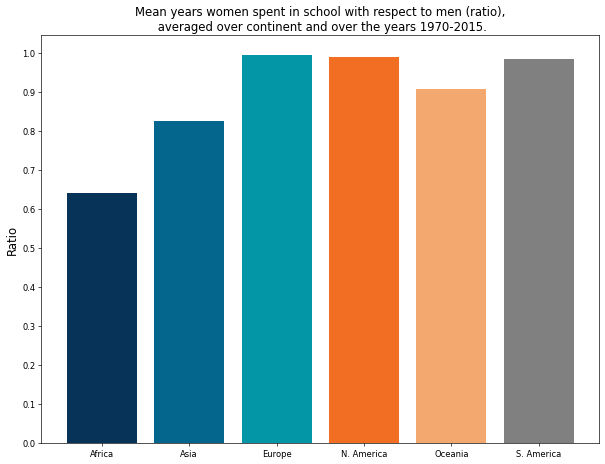

In [9]:
mean_continent =mean_edu_cont.groupby('continent').mean().mean(1)
plt.figure(figsize=(12, 9), dpi=60)
colors = list(map(contColor.get, mean_continent.index))
plt.yticks(np.arange(0,1.1,0.1))
plt.bar(np.arange(len(mean_continent)), mean_continent, color = colors, tick_label = mean_continent.index, alpha = 1)
plt.title('Mean years women spent in school with respect to men (ratio),\n averaged over continent and over the years 1970-2015.', fontsize = 14);
plt.ylabel('Ratio', fontsize = 14);

The distribution is fairly even in all continents except Africa and Asia, which are significantly lower.

#### How did each continent's performance evolve over time?

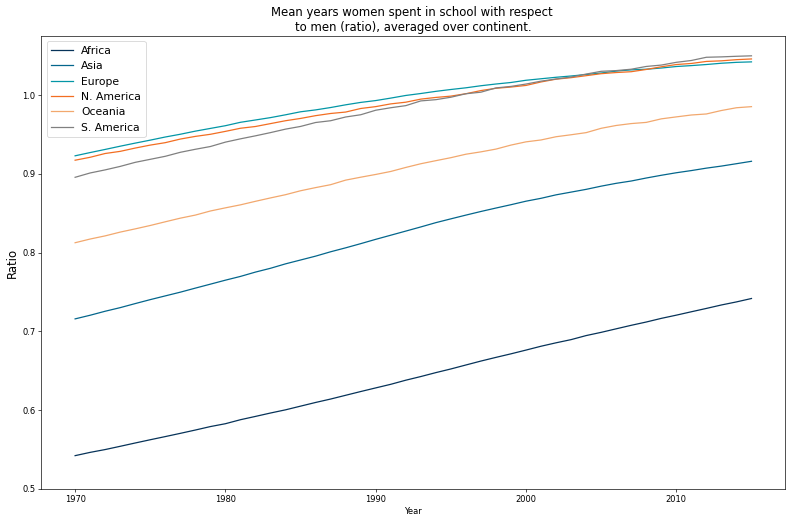

In [10]:
evol_cont = mean_edu_cont.groupby('continent').mean().T

plt.figure(figsize = (16,10), dpi =60)
for cont in evol_cont.columns:
    plt.plot(evol_cont[cont], color = contColor[cont]);
    
plt.xticks(range(0,len(evol_cont),10));
plt.legend(evol_cont.columns, fontsize = 13);
plt.title('Mean years women spent in school with respect \nto men (ratio), averaged over continent.', fontsize = 14);
plt.xlabel('Year')
plt.yticks(np.arange(0.5,1.09,0.1))

plt.ylabel('Ratio', fontsize = 14);


All continents have a positive education curve. In a few minutes we will see how true is this for individual countries.

#### Which continents have ratio of women/men education years currently ovewhelmingly above (or below) the critical ratio? What is this value?

In [11]:
print(f"The median ratio for the year 2015 is {mean_edu_cont['2015'].median()}")
print(f"The 25th percentile ratio for the year 2015 is {mean_edu_cont['2015'].describe()['25%']}")

The median ratio for the year 2015 is 1.02
The 25th percentile ratio for the year 2015 is 0.831


Originally, I used the median as the critical ratio. Turns out the median is pretty high $(1.02)$, so I decided to use the $25^\text{th}$ percentile as a critical value for low-performing continents and $1$ as the critical value for high performing continents.

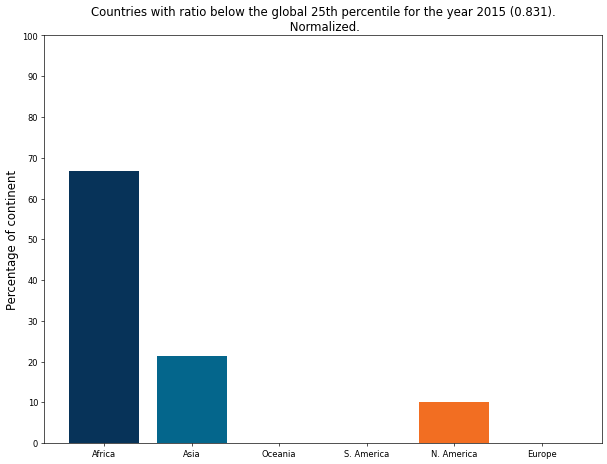

In [12]:
median = mean_edu_cont['2015'].describe()['25%'] 
mask = mean_edu_cont['2015'] < median
count_cont = mean_edu_cont[mask]
data = count_cont.groupby('continent').count()['country']
for continent in contName.values():
    if continent in data.index:
        continue
    data.at[continent] = 0
tot_count = mean_edu_cont.groupby('continent').count()['country']

plt.figure(figsize=(12, 9), dpi=60)
colors = list(map(contColor.get, data.index))
plt.bar(range(len(data)), 100*data/tot_count, color = colors, tick_label = data.index)
plt.title('Countries with ratio below the global 25th percentile for the year 2015 ({}).\n Normalized.'.format(median), fontsize = 14);
plt.yticks(np.arange(0,110,10))
plt.ylabel('Percentage of continent', fontsize = 14);


Almost 70% of African countries fall below the median ratio of women/men education years, while no Oceanic, South American, or European countries are below median.

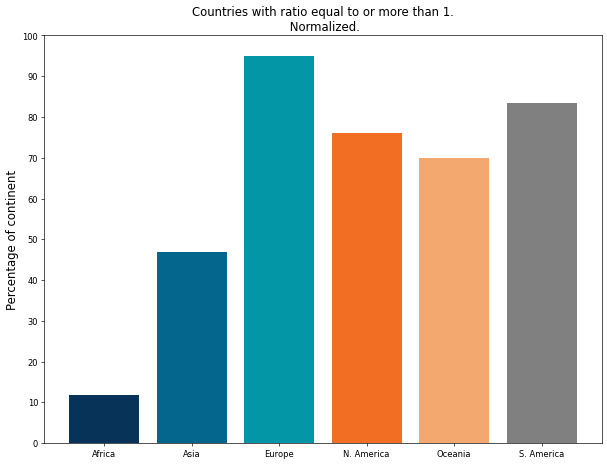

In [13]:
# median = mean_edu_cont['2015'].describe()['75%'] #mean_edu_cont['2015'].median()#mean_edu_cont['2015'].describe()['25%']
mask = mean_edu_cont['2015'] >= 1 
count_cont = mean_edu_cont[mask]
data = count_cont.groupby('continent').count()['country']
tot_count = mean_edu_cont.groupby('continent').count()['country']
plt.figure(figsize=(12, 9), dpi=60)
colors = list(map(contColor.get, data.index))
plt.bar(range(len(data)), 100*data/tot_count, color = colors, tick_label = data.index)
plt.title('Countries with ratio equal to or more than 1.\n Normalized.'.format(median), fontsize = 14);
plt.yticks(np.arange(0,110,10))
plt.ylabel('Percentage of continent', fontsize = 14);


Almost all European countries have already achieved a 1:1 ratio of education or higher.

#### How have some of the countries that started lowest been evolving over time?

##### Countries that started with women-to-men ratios below 0.4 are queried to examine their evolution.

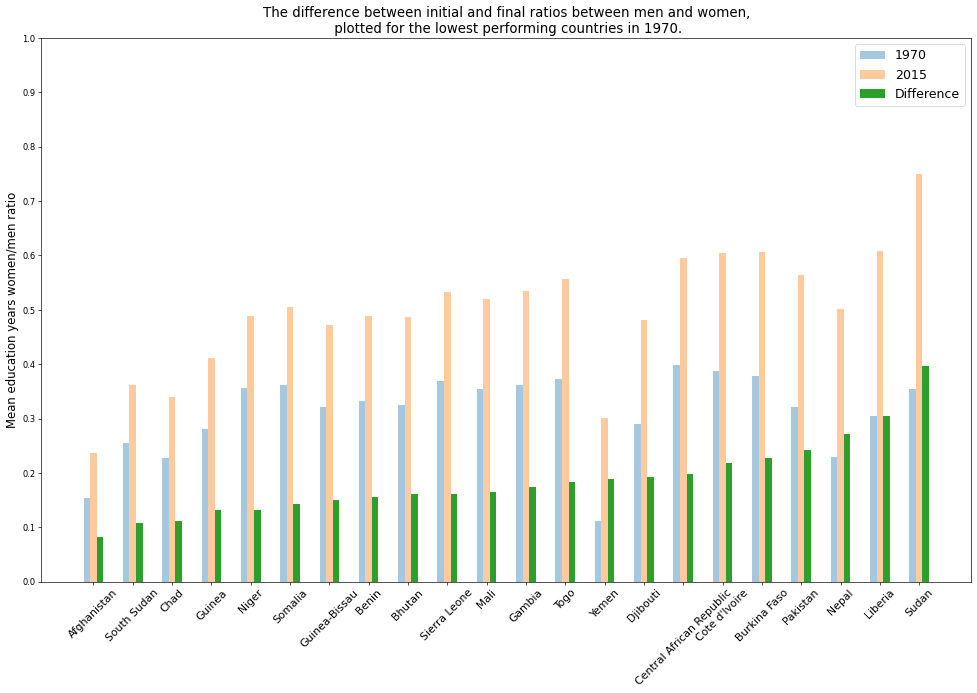

In [14]:
mean_edu_low = pd.read_csv('MyCSVs/mean_years_in_school_women_ratio_men_25_to_34_years.csv')
f= mean_edu_low.set_index(mean_edu_low['country']).drop(columns = 'country')
critvalue = 0.4
mask = f['1970'] < critvalue
data = f[mask]
data.insert(1, 'Difference', data['2015'] - data['1970'])
data = data.sort_values('Difference')
labels = data.index
ind = np.arange(len(labels))*3
width = 0.5
locations = ind + width  # xtick locations
plt.figure(figsize = (20,12), dpi = 60)
plt.bar(ind, data['1970'], width = width, label = '1970',alpha = 0.4);
plt.bar(ind+width*1, data['2015'], width = width, label = '2015', alpha =0.4);
plt.bar(ind+width*2, data['Difference'], width = width, label = 'Difference');
plt.xticks(locations, labels, fontsize = 13, rotation = 45);
plt.legend(fontsize = 15);
plt.yticks(np.arange(0,1.1,0.1))
plt.title('The difference between initial and final ratios between men and women,\n plotted for the lowest performing countries in 1970.', fontsize = 16)
plt.ylabel('Mean education years women/men ratio', fontsize = 14);
lowest_in_1970 = set(data.index)

Although a lot of countries are still very far from achieving equality; the trends show an increase in every single country.

#### How have some of the countries that ended up lowest been evolving over time?

##### Countries that currently present women-to-men education years ratios below 0.6 are queried to examine their evolution.

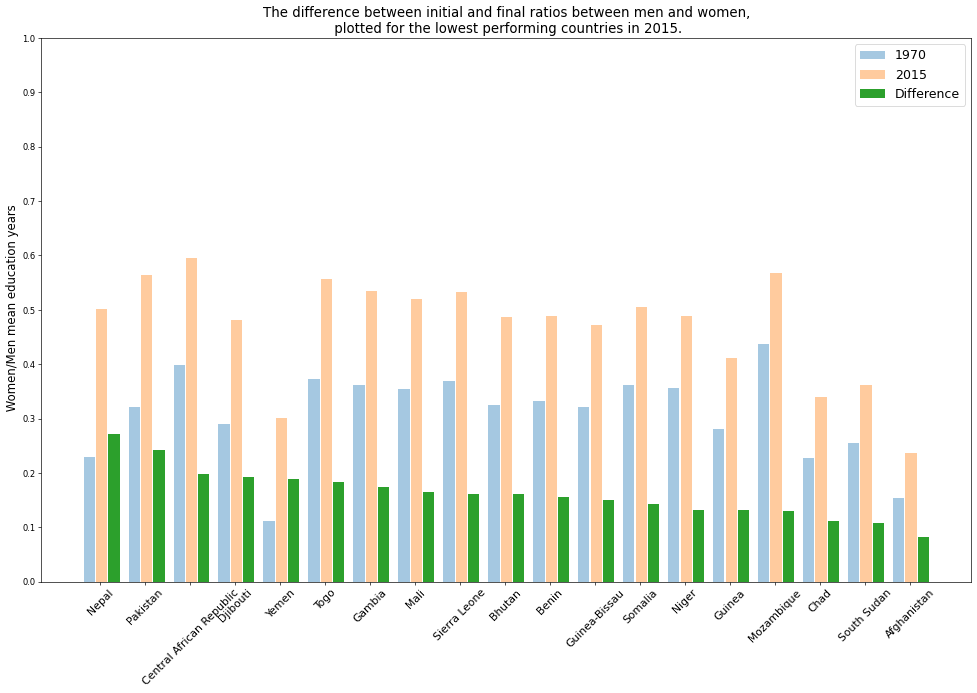

In [15]:
mean_edu_hi = pd.read_csv('MyCSVs/mean_years_in_school_women_ratio_men_25_to_34_years.csv')
f= mean_edu_hi.set_index(mean_edu_low['country']).drop(columns = 'country')
critvalue = 0.6
mask = f['2015'] < critvalue
data = f[mask]
data.insert(1, 'Difference', data['2015'] - data['1970'])
data = data.sort_values('Difference', ascending = False)
labels = data.index
ind = np.arange(len(labels))*2
width = 0.5
locations = ind + width  # xtick locations
plt.figure(figsize = (20,12), dpi = 60)
plt.bar(ind, data['1970'], width = width, label = '1970',alpha = 0.4);
plt.bar(ind+width*1.1, data['2015'], width = width, label = '2015', alpha =0.4);
plt.bar(ind+width*2.2, data['Difference'], width = width, label = 'Difference');
plt.xticks(locations, labels, fontsize = 13, rotation = 45);
plt.legend(fontsize = 15);
plt.yticks(np.arange(0,1.1,0.1))
plt.title('The difference between initial and final ratios between men and women,\n plotted for the lowest performing countries in 2015.', fontsize = 16)
plt.ylabel(' Women/Men mean education years', fontsize = 14);
lowest_in_2015 = set(data.index)

A lot of countries still fall far below the 1:1 ratio even in 2015. 

Notable observation are the entries of Afghanistan, South Sudan, and Chad. They  score the lowest female education scores for both 1970 and 2015, making them present the flattest improvement curve. More in the discussions.

<a id='part2'></a>
## Part 2: Employment
Description: Percentage of female population, age group 15-24, that has been employed in a given year.

<a id='wrangling2'></a>
### Data Wrangling

### General Properties


In [16]:
empl_rate = pd.read_csv('Data_original/Politics and industry/females_aged_15_24_employment_rate_percent.csv')
nacount = empl_rate.isna().sum().sum()
print(f"This dataset has {nacount} missing values.\n" )
display(empl_rate.head(1))

This dataset has 0 missing values.



,country,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Afghanistan,12.8,13.1,12.8,12.7,12.9,12.8,12.7,12.7,12.7,...,15.4,16.2,17.1,17.9,18.0,18.2,18.3,18.4,18.5,18.6


In [17]:
empl_rate.describe()

,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
count,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.00000,189.000000,189.000000,...,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000
mean,35.892434,35.633016,35.163862,34.831376,34.572328,34.239206,34.031852,34.05127,33.935503,33.834974,...,31.321852,31.314392,31.425291,31.391376,31.386561,31.317196,31.178889,31.019153,30.846878,30.670529
std,17.409579,17.161515,16.972143,16.940129,17.004939,17.031228,16.945091,16.93298,16.927139,17.121135,...,17.124328,17.035427,16.899808,16.905099,16.888129,16.887256,16.873133,16.866600,16.869532,16.879073
min,2.520000,2.270000,2.470000,2.910000,3.960000,3.960000,3.880000,4.18000,4.140000,4.020000,...,1.610000,1.680000,1.610000,1.630000,1.610000,1.640000,1.630000,1.630000,1.520000,1.400000
25%,23.900000,23.800000,23.200000,23.100000,21.800000,21.600000,21.600000,21.80000,22.600000,22.000000,...,18.100000,18.200000,18.300000,18.200000,19.000000,19.200000,19.100000,18.600000,18.400000,18.200000
50%,32.700000,32.600000,32.000000,31.700000,31.900000,31.900000,31.100000,31.00000,30.600000,30.500000,...,28.400000,28.400000,28.500000,28.400000,28.500000,28.700000,28.500000,28.300000,28.500000,28.000000
75%,48.500000,48.200000,46.600000,46.600000,46.100000,46.100000,45.300000,44.30000,44.400000,44.700000,...,44.000000,43.800000,43.500000,43.300000,43.300000,43.500000,43.300000,42.900000,42.400000,42.000000
max,85.500000,84.500000,82.900000,81.000000,79.400000,79.000000,79.000000,79.40000,79.900000,80.000000,...,75.400000,75.700000,76.400000,78.300000,77.700000,77.600000,77.500000,77.500000,77.400000,77.400000


Our data seems to be in the correct `float64` format. No missing values. Reasonable maximum and minimum values (falls within and around 100%).

In [18]:
empl_rate = pd.read_csv('Data_original/Politics and industry/females_aged_15_24_employment_rate_percent.csv')
empl_rate = AddContinents(empl_rate)

Count of countries before filtering: 189.
Adding continents column to dataset, please wait. 

Excluded Channel Islands from dataset.
Excluded Cote d'Ivoire from dataset.
Excluded Congo, Dem. Rep. from dataset.
Excluded Congo, Rep. from dataset.
Excluded Western Sahara from dataset.
Excluded Hong Kong, China from dataset.
Excluded Lao from dataset.
Excluded Macao, China from dataset.
Excluded Timor-Leste from dataset.
Excluded St. Vincent and the Grenadines from dataset.
Excluded Virgin Islands (U.S.) from dataset.

Success.
Count of remaining countries: 178.


In [19]:
display(empl_rate.head(1))

,country,continent,1991,1992,1993,1994,1995,1996,1997,1998,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Afghanistan,Asia,12.8,13.1,12.8,12.7,12.9,12.8,12.7,12.7,...,15.4,16.2,17.1,17.9,18.0,18.2,18.3,18.4,18.5,18.6


<a id='eda2'></a>
### Exploratory Data Analysis

#### How does each continent perform compared to the rest?

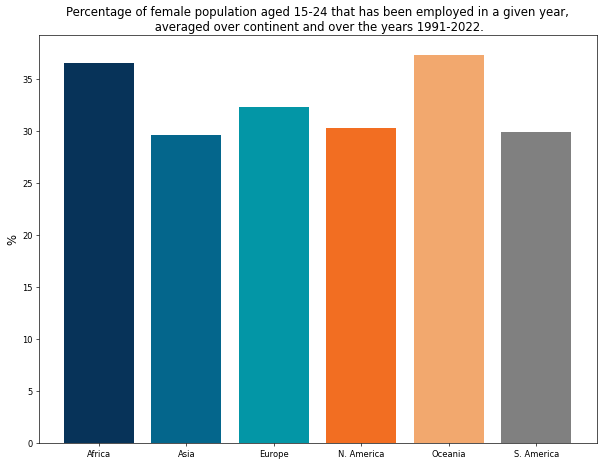

In [20]:
empl_rate_mean = empl_rate.groupby('continent').mean().mean(1)
plt.figure(figsize=(12, 9), dpi=60)
colors = list(map(contColor.get, empl_rate_mean.index))
plt.bar(np.arange(len(empl_rate_mean)), empl_rate_mean, color = colors, tick_label = empl_rate_mean.index, alpha = 1)
plt.title('Percentage of female population aged 15-24 that has been employed in a given year,\n averaged over continent and over the years 1991-2022.', fontsize = 14);
plt.ylabel('%', fontsize = 14);
# plt.legend()

The distribution is fairly even across continents.

#### How did each continent's performance evolve over time?

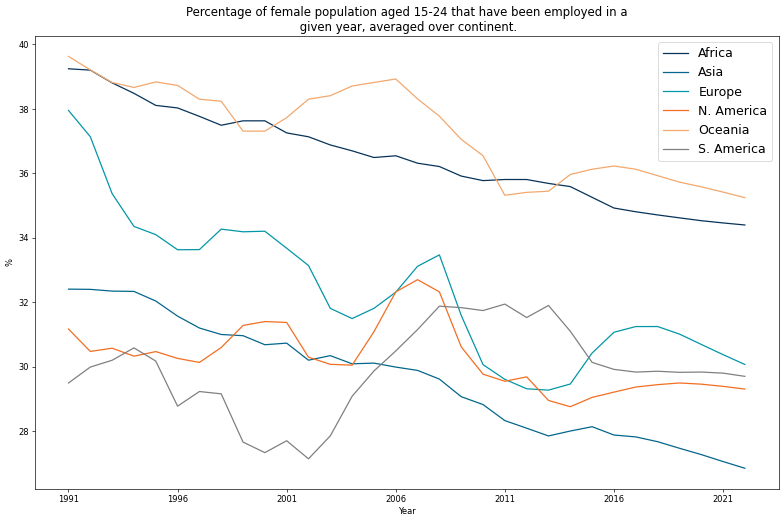

In [21]:
evol_cont = empl_rate.groupby('continent').mean().T
# ff.plot(figsize =(10,10));

plt.figure(figsize = (16,10), dpi =60)
linestyle = ['dashed', '--', '+']
for cont in evol_cont.columns:
    plt.plot(evol_cont[cont], color = contColor[cont]);

plt.xticks(range(0,len(evol_cont),5));
plt.legend(evol_cont.columns, fontsize = 15);
plt.title('Percentage of female population aged 15-24 that have been employed in a\n given year, averaged over continent.', fontsize = 14);
plt.xlabel('Year')
plt.ylabel('%');

It seems that the percentage of employed women has been going down consistently for all continents. There was a spike in the beginning of the 21st century in most continents, but numbers quickly went down after.

#### Which continents have ratio of women/men education years currently ovewhelmingly above (or below) the critical ratio? What is this value?

In [22]:
print(f"The median ratio for the year 2020 is {empl_rate['2020'].median()}")

The median ratio for the year 2020 is 28.25


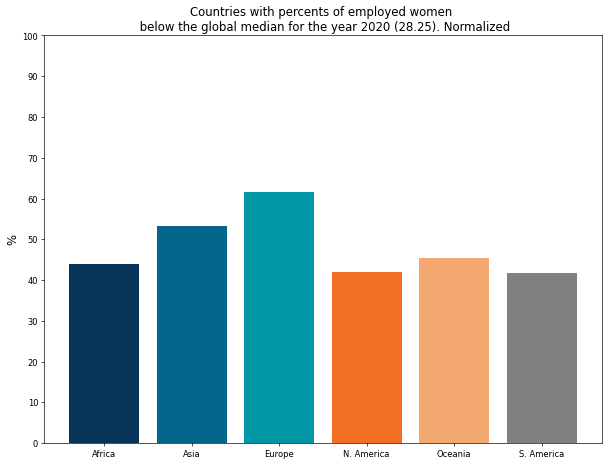

In [23]:
median = empl_rate['2020'].median()
mask = empl_rate['2020'] < median 
count_cont = empl_rate[mask]
data = count_cont.groupby('continent').count()['country']
for continent in contName.values():
    if continent in data.index:
        continue
    data.at[continent] = 0
tot_count = empl_rate.groupby('continent').count()['country']
plt.figure(figsize=(12, 9), dpi=60)
colors = list(map(contColor.get, data.index))
plt.bar(range(len(data)), 100*data/tot_count, color = colors, tick_label = data.index)
plt.yticks(np.arange(0,110,10))
plt.title(f'Countries with percents of employed women \n below the global median for the year 2020 ({median}). Normalized', fontsize = 14);
plt.ylabel('%', fontsize = 14);

The mean divides all continents almost by half. Curiously, a majority of Europe is below the already-low median of $28\%$.

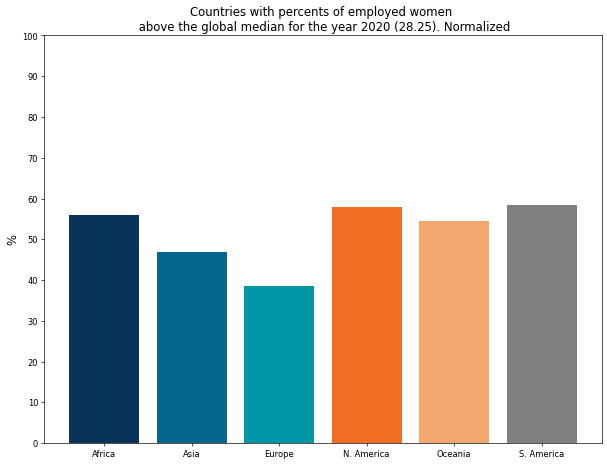

In [24]:
median = empl_rate['2020'].median()
mask = empl_rate['2020'] > median
count_cont = empl_rate[mask]
data = count_cont.groupby('continent').count()['country']
for continent in contName.values():
    if continent in data.index:
        continue
    data.at[continent] = 0
tot_count = empl_rate.groupby('continent').count()['country']
plt.figure(figsize=(12, 9), dpi=60)
colors = list(map(contColor.get, data.index))
plt.bar(range(len(data)), 100*data/tot_count, color = colors, tick_label = data.index)
plt.yticks(np.arange(0,110,10))
plt.title(f'Countries with percents of employed women \n above the global median for the year 2020 ({median}). Normalized', fontsize = 14);
plt.ylabel('%', fontsize = 14);

#### How have some of the countries that started lowest been evolving over time?

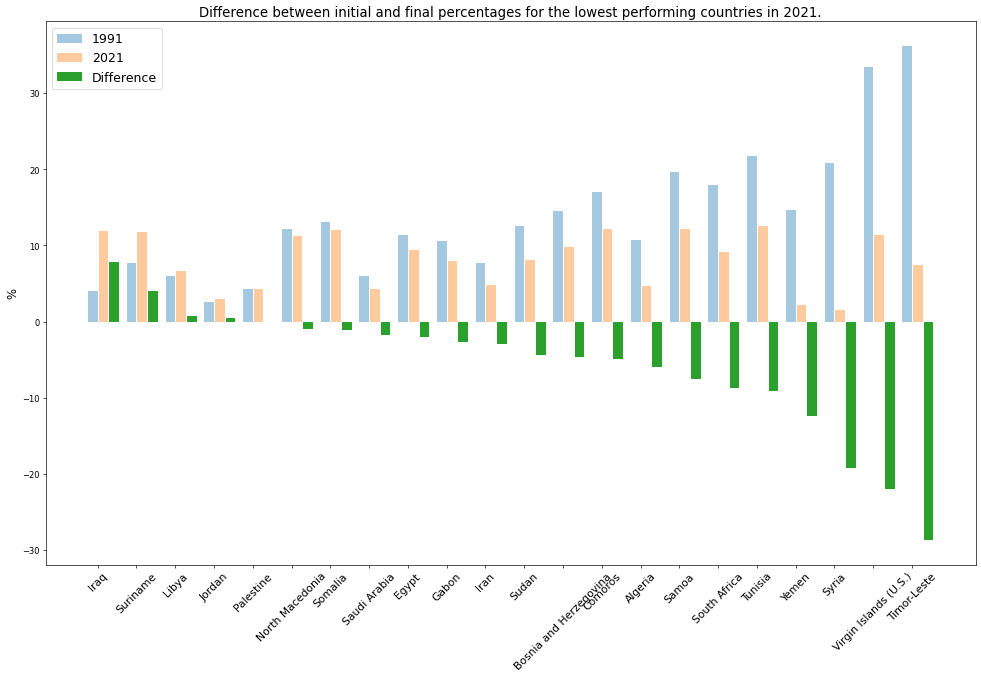

In [25]:
prcnt_wmn = pd.read_csv('Data_original/Politics and industry/females_aged_15_24_employment_rate_percent.csv')
f = prcnt_wmn.set_index(prcnt_wmn['country']).drop(columns = 'country')
critvalue = f['2021'].describe()['25%']*0.7
mask = f['2021'] < critvalue
data = f[mask]
data.insert(1, 'Difference', data['2021'] - data['1991'])
data = data.sort_values('Difference', ascending = False)
labels = data.index
ind = np.arange(len(labels))*2
width = 0.5
locations = ind + width / 2  # xtick locations
plt.figure(figsize = (20,12), dpi = 60)
plt.bar(ind, data['1991'], width = width, label = '1991',alpha = 0.4);
plt.bar(ind+width*1.1, data['2021'], width = width, label = '2021', alpha =0.4);
plt.bar(ind+width*2.2, data['Difference'], width = width, label = 'Difference');
plt.title('Difference between initial and final percentages for the lowest performing countries in 2021.', fontsize = 16)
plt.xticks(locations, labels, fontsize = 13, rotation = 45);
plt.legend(fontsize = 15);
plt.ylabel('%', fontsize = 14);

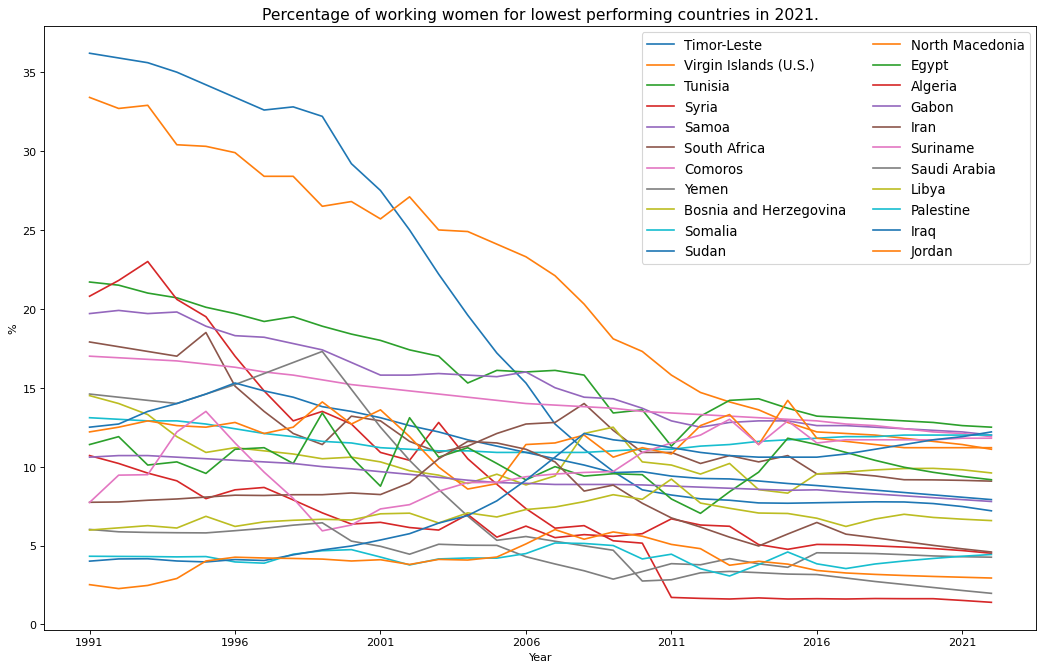

In [26]:
data = f[mask]
data = data.sort_values('1991', ascending = False)
labels = data.index
ind = np.arange(len(labels))*2
width = 0.5
locations = ind + width / 2  # xtick locations
evol = data.T
plt.figure(figsize = (16,10), dpi = 80)
plt.plot(evol)
# for country in evol.columns:
#     plt.plot(evol[country], linestyle = 'dashed')

plt.title('Percentage of working women for lowest performing countries in 2021.', fontsize = 14);
plt.xticks(range(0,len(data.columns),5));
plt.xlabel('Year')
plt.ylabel('%')
plt.legend(evol.columns, fontsize = 12, ncol = 2);

The previous two plots show how the percentage in lowest performing countries in 2021 have changed. Unlike education, we can see that less and less females opt out of paid employment. More in the discussions.

<a id='part3'></a>
## Part 3: Political Representation
Description: Percent of national parlimenary seats held by women.

<a id='wrangling3'></a>
### Data Wrangling

### General Properties


In [27]:
wmn_prlmnt = pd.read_csv('Data_original/Politics and industry/wmn_prlmnt.csv')
nacount = wmn_prlmnt.isna().sum().sum()
print(f"This dataset has {nacount} missing values.\n" )
display(wmn_prlmnt.head(1))

This dataset has 4599 missing values.



,country,1945,1946,1947,1948,1949,1950,1951,1952,1953,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,27.4,27.4,27.4,27.4,27.4,27.7,27.8,27.9,27.2,27.2


To reduce the number of missing values, we first drop the first 28 year columns.

In [28]:
wmn_prlmnt_clean = wmn_prlmnt.drop(wmn_prlmnt.iloc[:, 1:29], axis = 1)
nacount = wmn_prlmnt_clean.isna().sum().sum()
print(f"This dataset has {nacount} missing values.\n" )
display(wmn_prlmnt_clean.head(1))

This dataset has 1371 missing values.



,country,1973,1974,1975,1976,1977,1978,1979,1980,1981,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Afghanistan,0.46,0.56,0.66,0.76,0.85,0.94,1.03,1.12,1.2,...,27.4,27.4,27.4,27.4,27.4,27.7,27.8,27.9,27.2,27.2


Then we exclude all countries with more than 5 NA values.

In [29]:
wmn_prlmnt_clean = wmn_prlmnt.drop(wmn_prlmnt.iloc[:, 1:29], axis = 1)
f = list(wmn_prlmnt_clean.index)
f.reverse()
exc_coun = [] # a list to save excluded countries based on NaN values
#Excluded rows (countries) with more than 5 NaN values.
for country_index in f:
    countryname = wmn_prlmnt_clean.iloc[country_index]['country']
    if wmn_prlmnt_clean.iloc[country_index,:].isna().sum() > 4:
        exc_coun.append(countryname)
        wmn_prlmnt_clean.drop([country_index], inplace = True)
nacount = wmn_prlmnt_clean.isna().sum().sum()
print(f"This dataset has {nacount} missing values.\n" )
# exc_coun

This dataset has 30 missing values.



In [30]:
wmn_prlmnt_clean.fillna(method = 'ffill' , inplace = True)
wmn_prlmnt_clean.to_csv('MyCSVs/wmn_in_prlmnt_almost_clean.csv', index = False)
nacount = wmn_prlmnt_clean.isna().sum().sum()
print(f"This dataset has {nacount} missing values.\n" )

This dataset has 0 missing values.



#### Final step of data cleaning.

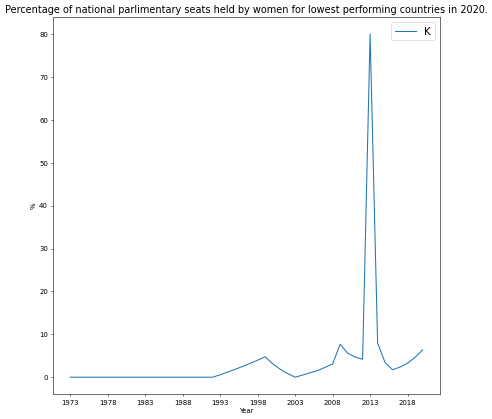

In [31]:
wmn_prlmnt_clean = pd.read_csv('MyCSVs/wmn_in_prlmnt_almost_clean.csv')
f = wmn_prlmnt_clean.set_index(wmn_prlmnt_clean['country']).drop(columns = ['country'])
plt.figure(figsize = (10,10), dpi =50)
plt.plot(f.T['Kuwait']);
plt.title('Percentage of national parlimentary seats held by women for lowest performing countries in 2020.', fontsize = 14);
plt.xticks(range(0,len(f.columns),5));
plt.xlabel('Year')
plt.ylabel('%')
plt.legend('Kuwait', fontsize = 15);

wmn_prlmnt_clean.query('country != "Kuwait"', inplace = True)
wmn_prlmnt_clean.reset_index(inplace = True, drop = True)
wmn_prlmnt_clean.to_csv('MyCSVs/wmn_in_prlmnt_CLEAN.csv', index = False)

As one can see, there is a strange spike in the data for Kuwait. Upon fact checking (http://archive.ipu.org/pdf/publications/wip2013-e.pdf), turns out this is an entry error. For this reason, I have removed the row altogther from the dataset. (This was discovered later in the analysis, but I moved that part to the wrangling section for clarity.)

In [32]:
wmn_prlmnt_clean.head(1)

,country,1973,1974,1975,1976,1977,1978,1979,1980,1981,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Afghanistan,0.46,0.56,0.66,0.76,0.85,0.94,1.03,1.12,1.2,...,27.4,27.4,27.4,27.4,27.4,27.7,27.8,27.9,27.2,27.2


In [33]:
wmn_prlmnt_clean.describe()

,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,...,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,6.012656,6.264141,6.643828,7.193203,7.197891,7.560234,7.792422,8.035391,8.218828,8.356016,...,20.164375,21.159062,21.696484,22.146719,22.432578,23.254453,23.854922,24.215781,24.637656,25.267500
std,6.073347,6.259395,6.540226,6.970961,7.044784,7.311084,7.572245,7.670823,7.545501,7.591067,...,11.186339,11.609223,11.621719,11.788482,11.812795,11.916663,11.969931,12.154224,12.051485,12.162694
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.110000,0.560000,0.000000,0.000000,0.000000,0.000000
25%,2.102500,2.492500,2.360000,2.670000,2.762500,2.870000,2.865000,2.832500,2.857500,2.730000,...,12.175000,13.200000,13.575000,13.775000,13.850000,14.975000,15.275000,15.625000,15.475000,16.075000
50%,4.520000,4.560000,4.625000,5.000000,4.785000,5.000000,5.450000,5.735000,6.505000,6.020000,...,17.050000,17.900000,19.000000,19.850000,20.150000,21.350000,21.750000,21.500000,22.400000,23.050000
75%,6.705000,6.865000,7.847500,8.557500,8.845000,9.500000,9.475000,9.995000,10.450000,11.150000,...,26.725000,27.775000,29.175000,29.900000,29.775000,30.925000,32.800000,33.725000,33.350000,33.975000
max,31.700000,33.200000,33.000000,32.800000,32.600000,32.400000,32.000000,33.100000,33.300000,33.600000,...,46.100000,57.000000,60.000000,60.100000,60.300000,60.500000,60.800000,61.300000,55.700000,55.700000


Our data seems to be in the correct `float64` format. No missing values. Reasonable maximum and minimum values (falls within 100%).

In [34]:
#dropped the rows not recognized by pyCountry
# empl_rate
wmn_prlmnt_clean= pd.read_csv('MyCSVs/wmn_in_prlmnt_CLEAN.csv')
wmn_prlmnt_clean = AddContinents(wmn_prlmnt_clean)

Count of countries before filtering: 128.
Adding continents column to dataset, please wait. 

Excluded Cote d'Ivoire from dataset.
Excluded Congo, Dem. Rep. from dataset.
Excluded Congo, Rep. from dataset.
Excluded Lao from dataset.

Success.
Count of remaining countries: 124.


In [35]:
display(wmn_prlmnt_clean.head(3))

,country,continent,1973,1974,1975,1976,1977,1978,1979,1980,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Afghanistan,Asia,0.46,0.56,0.66,0.76,0.85,0.94,1.03,1.12,...,27.4,27.4,27.4,27.4,27.4,27.7,27.8,27.9,27.2,27.2
1,Albania,Europe,31.70,33.20,33.00,32.80,32.60,32.40,31.90,31.40,...,16.1,15.9,15.7,18.8,21.8,24.8,27.9,28.6,29.5,29.5
2,United Arab Emirates,Asia,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,5.0,17.5,19.2,20.8,22.5,29.4,36.3,43.1,50.0,50.0


<a id='eda3'></a>
### Exploratory Data Analysis

#### How does each continent perform compared to the rest?

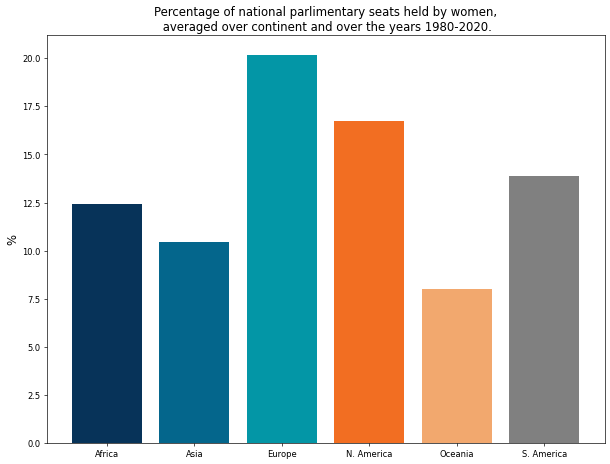

In [36]:
wmn_prlmnt_cont = wmn_prlmnt_clean.groupby('continent').mean().mean(1)
plt.figure(figsize=(12, 9), dpi=60)
colors = list(map(contColor.get, wmn_prlmnt_cont.index))
plt.bar(np.arange(len(wmn_prlmnt_cont)), wmn_prlmnt_cont, color = colors, tick_label = wmn_prlmnt_cont.index, alpha = 1)
plt.title('Percentage of national parlimentary seats held by women,\n averaged over continent and over the years 1980-2020.', fontsize = 14);
plt.ylabel('%', fontsize = 14);
# plt.legend()

One can see from the get-go that the representation of women in the parliament is very low across the world; with Europe being the leading continent with an average representation of just $20\%$.

#### How did each continent's performance evolve over time?

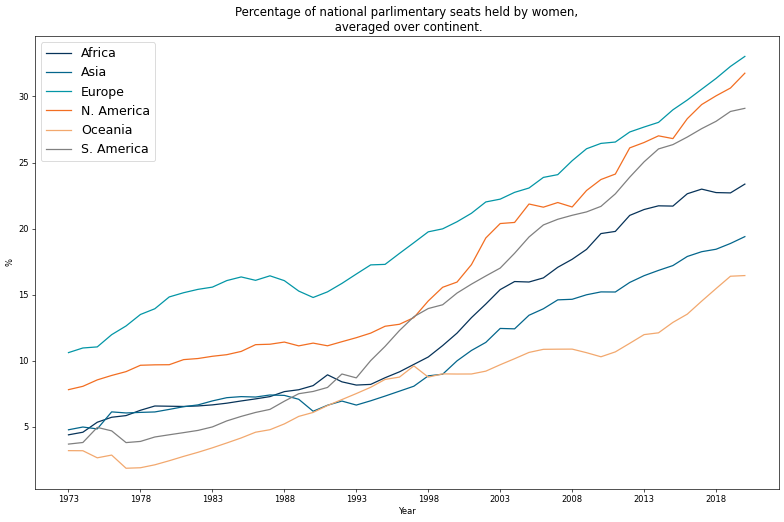

In [37]:
evol_cont = wmn_prlmnt_clean.groupby('continent').mean().T
# ff.plot(figsize =(10,10));

plt.figure(figsize = (16,10), dpi =60)
linestyle = ['dashed', '--', '+']
for cont in evol_cont.columns:
    plt.plot(evol_cont[cont], color = contColor[cont]);

plt.xticks(range(0,len(evol_cont),5));
plt.legend(evol_cont.columns, fontsize = 15);
plt.title('Percentage of national parlimentary seats held by women,\n averaged over continent.', fontsize = 14);
plt.xlabel('Year')
plt.ylabel('%');

It can be seen, however, that these numbers are going up; albeit slowly. All continents are on the rise in female political representation with varying rates; but Europe remains in the lead throughout the past 50 years.

#### Which continents have ratio of women/men education years currently ovewhelmingly above (or below) the critical ratio? What is this value?

In [38]:
median = math.trunc(wmn_prlmnt_clean['2020'].median())
print(f"The median percent for the year 2020 is {median}.")

The median percent for the year 2020 is 23.


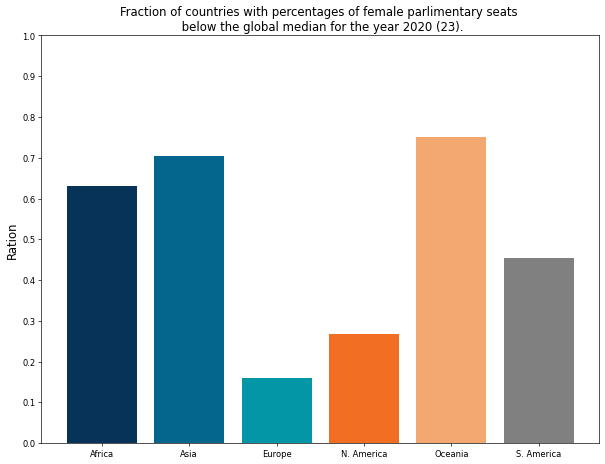

In [39]:
median = wmn_prlmnt_clean['2020'].median()
mask = wmn_prlmnt_clean['2020'] < median  #f['1970'].describe()['25%']
count_cont = wmn_prlmnt_clean[mask]
data = count_cont.groupby('continent').count()['country']
for continent in contName.values():
    if continent in data.index:
        continue
    data.at[continent] = 0
tot_count = wmn_prlmnt_clean.groupby('continent').count()['country']
plt.figure(figsize=(12, 9), dpi=60)
colors = list(map(contColor.get, data.index))
plt.bar(range(len(data)), data/tot_count, color = colors, tick_label = data.index)
plt.title(f'Fraction of countries with percentages of female parlimentary seats \n below the global median for the year 2020 ({math.trunc(median)}).', fontsize = 14);
plt.yticks(np.arange(0,1.1,0.1))
plt.ylabel('Ration', fontsize = 14);

Oceanic, Asian and African countries are overwhelmingly below the median, while Europe has only 15% of its countries below it.

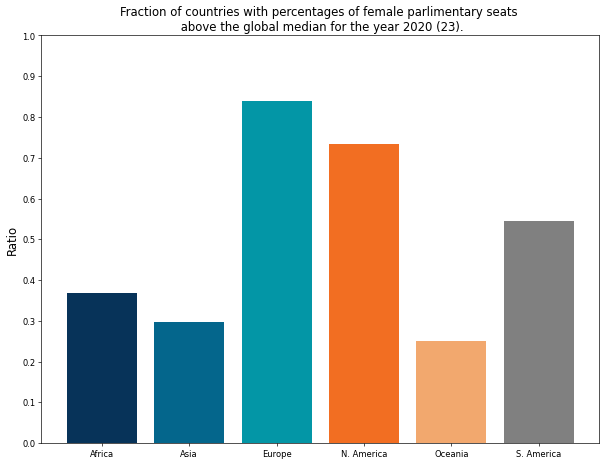

In [40]:
median = wmn_prlmnt_clean['2020'].median()
mask = wmn_prlmnt_clean['2020'] > median  #f['1970'].describe()['25%']
count_cont = wmn_prlmnt_clean[mask]
data = count_cont.groupby('continent').count()['country']
for continent in contName.values():
    if continent in data.index:
        continue
    data.at[continent] = 0
tot_count = wmn_prlmnt_clean.groupby('continent').count()['country']
plt.figure(figsize=(12, 9), dpi=60)
colors = list(map(contColor.get, data.index))
plt.bar(range(len(data)), data/tot_count, color = colors, tick_label = data.index)
plt.title(f'Fraction of countries with percentages of female parlimentary seats \n above the global median for the year 2020 ({math.trunc(median)}).', fontsize = 14);
plt.yticks(np.arange(0,1.1,0.1))
plt.ylabel('Ratio', fontsize = 14);

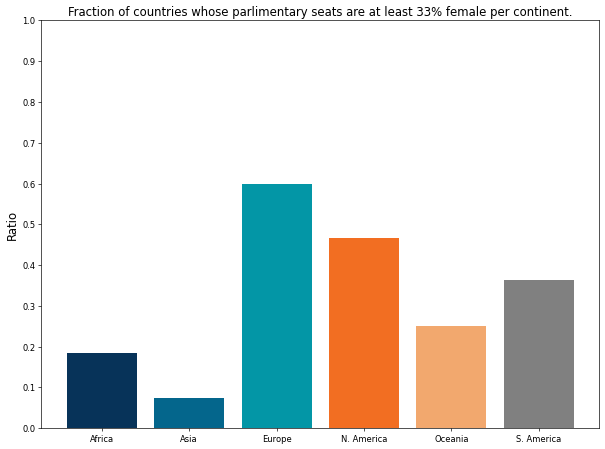

In [41]:
#Number of countries that have almost achieved equality per continent
mask = wmn_prlmnt_clean['2020'] >= 33
count_cont = wmn_prlmnt_clean[mask]
data = count_cont.groupby('continent').count()['country']
for continent in contName.values():
    if continent in data.index:
        continue
    data.at[continent] = 0
tot_count = wmn_prlmnt_clean.groupby('continent').count()['country']
plt.figure(figsize=(12, 9), dpi=60)
colors = list(map(contColor.get, data.index))
plt.bar(range(len(data)), data/tot_count, color = colors, tick_label = data.index)
plt.title('Fraction of countries whose parlimentary seats are at least 33% female per continent.', fontsize = 14);
plt.yticks(np.arange(0,1.1,0.1))
plt.ylabel('Ratio', fontsize = 14);

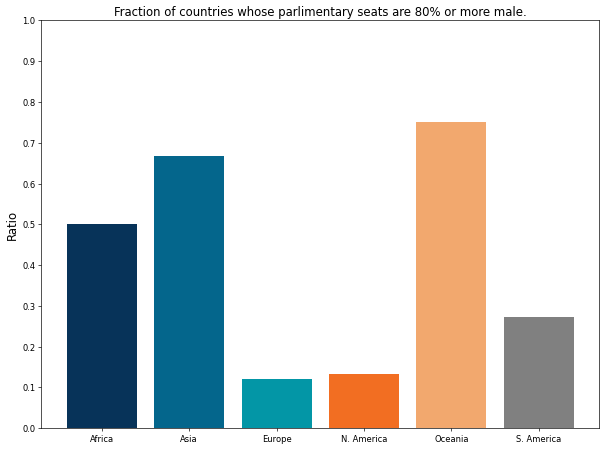

In [42]:
mask = wmn_prlmnt_clean['2020'] <= 20
count_cont = wmn_prlmnt_clean[mask]
data = count_cont.groupby('continent').count()['country']
for continent in contName.values():
    if continent in data.index:
        continue
    data.at[continent] = 0
tot_count = wmn_prlmnt_clean.groupby('continent').count()['country']
plt.figure(figsize=(12, 9), dpi=60)
colors = list(map(contColor.get, data.index))
plt.bar(range(len(data)), data/tot_count, color = colors, tick_label = data.index)
plt.title('Fraction of countries whose parlimentary seats are 80% or more male.', fontsize = 14);
plt.yticks(np.arange(0,1.1,0.1))
plt.ylabel('Ratio', fontsize = 14);

#### How have some of the countries that started lowest been evolving over time?

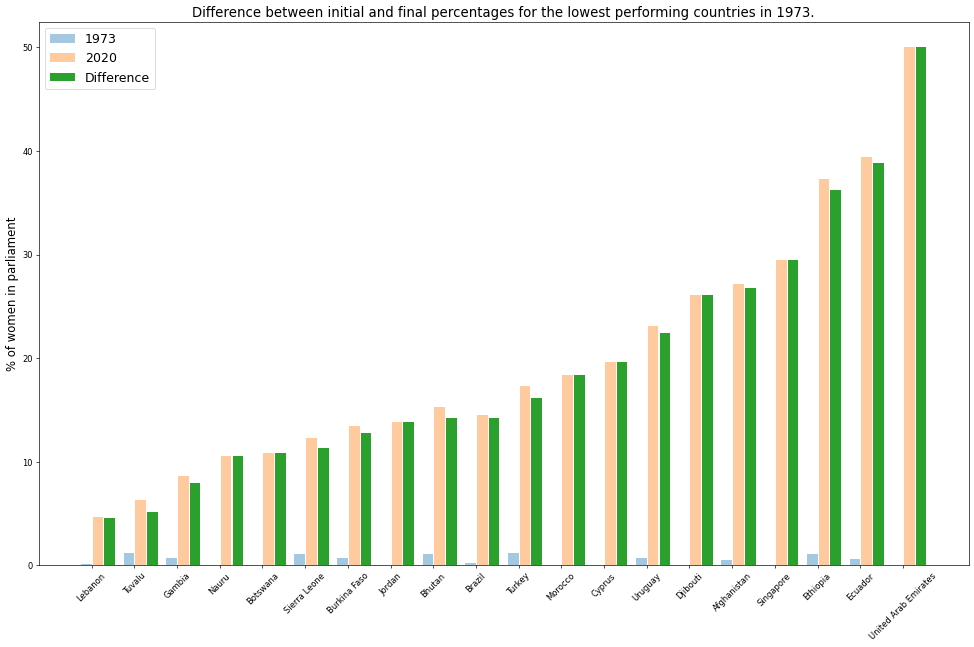

In [43]:
prcnt_wmn = pd.read_csv('MyCSVs/wmn_in_prlmnt_CLEAN.csv')
f = prcnt_wmn.set_index(prcnt_wmn['country']).drop(columns = 'country')
mask = f['1973'] < f['1973'].describe()['25%']*0.6
data = f[mask]
data.insert(1, 'Difference', data['2020'] - data['1973'])
data = data.sort_values('Difference', ascending = True)
labels = data.index
ind = np.arange(len(labels))*2
width = 0.5
locations = ind + width / 2  # xtick locations
plt.figure(figsize = (20,12), dpi = 60)
plt.bar(ind, data['1973'], width = width, label = '1973',alpha = 0.4);
plt.bar(ind+width*1.1, data['2020'], width = width, label = '2020', alpha =0.4);
plt.bar(ind+width*2.2, data['Difference'], width = width, label = 'Difference');
plt.xticks(locations, labels, fontsize = 10, rotation = 45);
plt.legend(fontsize = 15);
plt.title('Difference between initial and final percentages for the lowest performing countries in 1973.', fontsize = 16)
plt.ylabel('% of women in parliament', fontsize = 14);

Most low performing countries have seen an increase in female political representation. 
The most notable entry is the United Arab Emirates, which starts with an entirely male parliament and ends up an exact equality between the sexes in 2020.

#### How have some of the countries that ended up lowest been evolving over time?

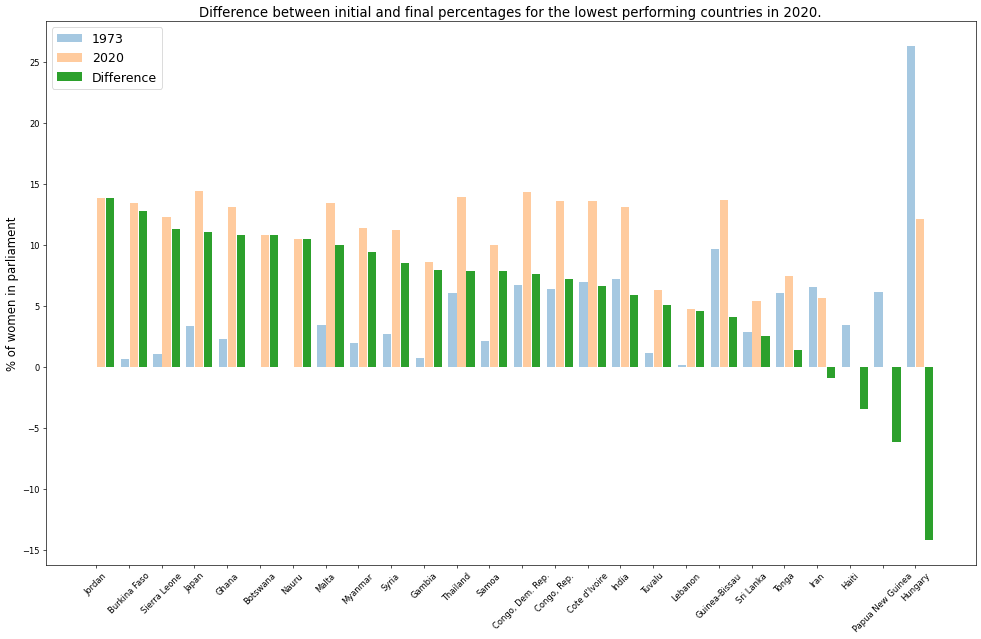

In [44]:
prcnt_wmn = pd.read_csv('MyCSVs/wmn_in_prlmnt_CLEAN.csv')
f = prcnt_wmn.set_index(prcnt_wmn['country']).drop(columns = ['country'])
mask = f['2020'] < f['2020'].describe()['25%']*0.9
data = f[mask]
data.insert(1, 'Difference', data['2020'] - data['1973'])
data = data.sort_values('Difference', ascending = False)
labels = data.index
ind = np.arange(len(labels))*2
width = 0.5
locations = ind + width / 2  # xtick locations
plt.figure(figsize = (20,12), dpi = 60)
plt.bar(ind, data['1973'], width = width, label = '1973',alpha = 0.4);
plt.bar(ind+width*1.1, data['2020'], width = width, label = '2020', alpha =0.4);
plt.bar(ind+width*2.2, data['Difference'], width = width, label = 'Difference');
plt.xticks(locations, labels, fontsize = 10, rotation = 45);
plt.legend(fontsize = 15);
plt.title('Difference between initial and final percentages for the lowest performing countries in 2020.', fontsize = 16)
plt.ylabel('% of women in parliament', fontsize = 14);

In sharp contrast to the United Arab Emirates, there is Hungary, which started with a relatively high percentage of $26\%$ but ended up with less than $13\%$ females in its parliament.

#### What is the evolution graph for highest and lowest performing countries?

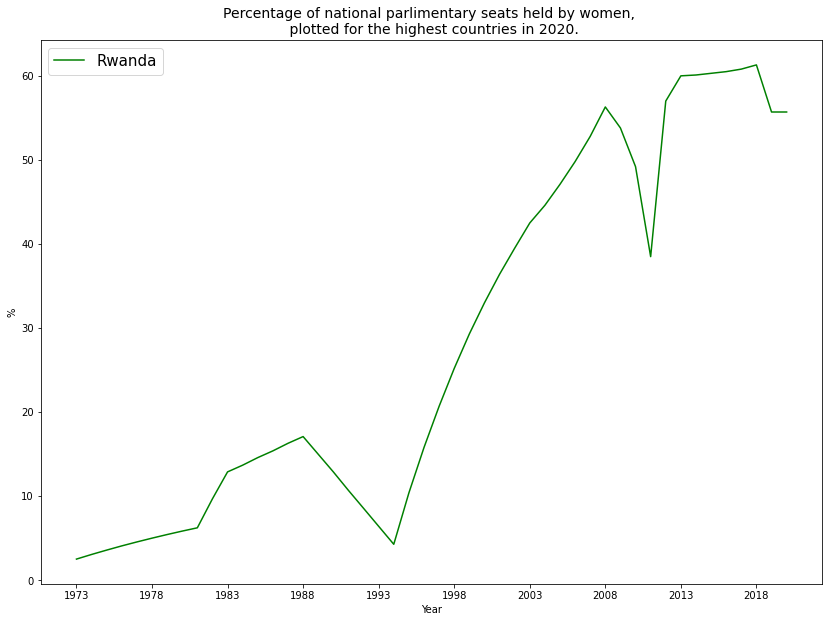

In [45]:
prcnt_wmn = pd.read_csv('MyCSVs/wmn_in_prlmnt_CLEAN.csv')
f = prcnt_wmn.set_index(prcnt_wmn['country']).drop(columns = ['country'])
mask = f['2020'] == f['2020'].max()
data = f[mask].T
plt.figure(figsize = (14,10))
colors = ['g', 'orange']
for i, cont in enumerate(data.columns):
    plt.plot(data[cont], color = colors[i]);

plt.xticks(range(0,len(data),5));
plt.legend(data.columns, fontsize = 15);
plt.title('Percentage of national parlimentary seats held by women, \n plotted for the highest countries in 2020.', fontsize = 14);
plt.xlabel('Year')
plt.ylabel('%');

Rwanda presents the highest female representation globally, with 60% percentage. More details in the discussion.

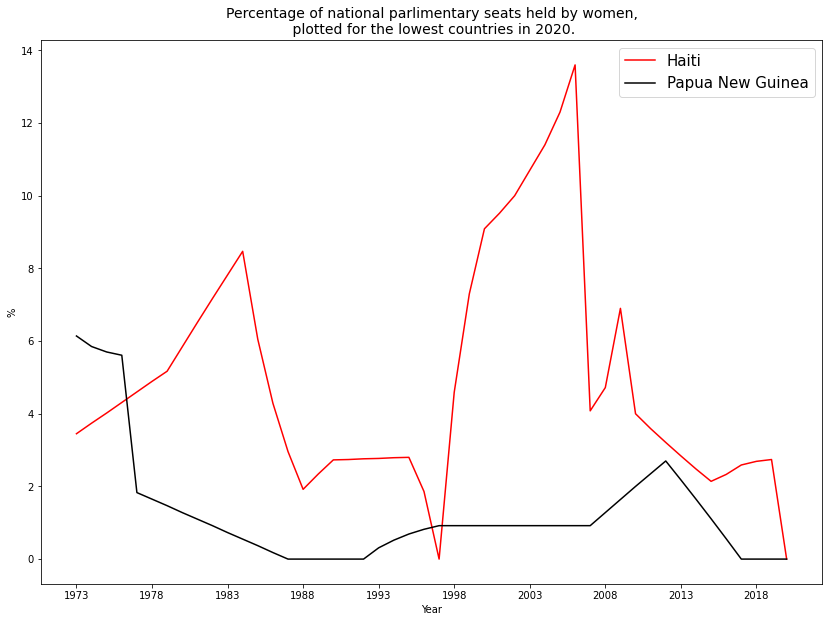

In [46]:
mask = f['2020'] == f['2020'].min()
data = f[mask].T
plt.figure(figsize = (14,10))
colors = ['r', 'k']
for i, cont in enumerate(data.columns):
    plt.plot(data[cont], color = colors[i]);
plt.xticks(range(0,len(data),5));
plt.legend(data.columns, fontsize = 15);
plt.title('Percentage of national parlimentary seats held by women,\n plotted for the lowest countries in 2020.', fontsize = 14);
plt.xlabel('Year')
plt.ylabel('%');

Haiti's evolution curve is highly irregular, and does not show any consistent gender ideology. More in the discussion.

<a id='conclusions'></a>
## Conclusions

### Education:
Gender inequality are one of the most addressed topics of our time. A pillar of the problem is inequality in education and the belief that women should not be educated; a belief that is very common in low income countries. 

#### How does each continent perform compared to the rest?
In my analysis, I have shown that years women spend in school on average has been significantly less than those of men throughout the world. The highest continents in female education rates are Europe and the Americas, with the far lowest being Africa.

#### How did each continent's performance evolve over time?
Although those numbers are coming closer together gradually virtually everywhere, some African countries are still a long way from complete equality. 

#### Which continents have ratio of women/men education years currently ovewhelmingly above (or below) the critical ratio? What is this value?

In the majority (70%) of African countries, an average girl spends 83% or less, of the time an average boy spends in schools. In sharp contrast, in nearly (95%) of European countries; an average girl spends time in school that is equal or more than an average boy.

#### How have some of the countries that started lowest been evolving over time?

Afghanistan and South Sudan, countries with significant political instabilites, have seen the smallest improvement in female education rates. In 2015, an average South Sudani girl spent in education 40% of an average boy, while an Afghan girl spent only 25% as an Afghan boy.
Some of this could be explained by the extremist ideologies enforced in these countries.

### Employment:
To highlight the effect of gender roles across countries, we examine the representation of women in the workforce.

#### How does each continent perform compared to the rest?
The percentage of female population with paid employment varied between 30-36% across continents. No significant difference observed.

#### How did each continent's performance evolve over time?
Since 1991, the percentage of females with paid employment has been gradually decreasing.

#### Which continents have ratio of women/men education years currently ovewhelmingly above (or below) the critical ratio? What is this value?

In 60% of European countries, less than 30% (the median) of able women are employed in paid jobs. Without clear statistics about percentage of males in the workforce, we can not decide whether to explain this low percentage based on gender or economic stability. About 57% of African countries are above the median, with 30% or more of their female population in paid jobs. This can be explained by the low-income nature of most African countries, and the heavy reliance on agricultur and manual labor.

#### How have some of the countries that started lowest been evolving over time?

There is a sharp decrease in working female population in many countries, notably Syria and Timor-Leste. 

Women in Timor-Leste suffer inequality under a strong patriarchal society, which serves to explain the low rate of female employment. 
Source: https://iwda.org.au/timor-leste/

Although the analysis show a decrease of female participation in the workforce, the news say otherwise. Since the advent of the Syrian war and the escaping of many refugees, women are becoming more and more crucial in the labor force.
Source: https://timep.org/syrias-women/economy/the-shifting-role-of-women-in-syrias-economy/

### Political Representation:
To highlight the effect of gender roles across countries, we examine the political representation of women in the national parliaments.

#### How does each continent perform compared to the rest?
The percentage of female parliamentary seats varied from as low as 7.5% in Oceania, to 20% in Europe. It is evident that the percentage of females in the parliament is low across all continents.

#### How did each continent's performance evolve over time?
Since 1973, the percentage of females in national parliaments has been steadily -but slowly- increasing.

#### Which continents have ratio of women/men education years currently ovewhelmingly above (or below) the critical ratio? What is this value?

Over 60% of Asian, African, and Oceanian countries have female parliament representatives below the median percentage (23%). In contrast, over 60% European and North American countries are above the median.

Looking at more representative numbers: It was found that only 60% of European countries have at least a third female parliament, and only 50% of North American countries. On the other hand, nearly 70% of Asian and Oceanic, and half of African countries have parliaments that are 80% male.

#### How have some of the countries that started lowest been evolving over time?

Most low performing countries have seen an increase in female political representation. 

United Arab Emirates, which starts with an entirely male parliament and ends up an exact equality between the sexes in 2020. This improvement can be attributed to the economic and political stability of smaller gulf countries.

Hungary started with a relatively high percentage of $26\%$ but ended up with less than $13\%$ females in its parliament. According to wikipedia, the high numbers of female parliamentary seats were merely a facade, while men were the key policy makers. After the fall of communism in Hungary, the first free elections were held in 1990 where only 7% of the winning seats were female (and that explains the drop in numbers).
Source:https://en.wikipedia.org/wiki/Women_in_Hungary#Suffrage_and_politics

Rwanda boasts the highest percentage of female participation in the parliament in the world (60%). This sharp increase occured in 1995, after the Rwandan genocide, where over a million Rwandans were massacred in a civil war. This led to a population that was 60-70% female. 
Source: https://choice.npr.org/index.html?origin=https://www.npr.org/sections/goatsandsoda/2016/07/29/487360094/invisibilia-no-one-thought-this-all-womans-debate-team-could-crush-it

The results for Haiti was inconclusive, and conflicts with data from other sources. https://www.ifes.org/publications/violence-against-women-elections-and-representation-women-haitian-politics

https://www.theglobaleconomy.com/Haiti/Women_in_parliament/

## Limitations
1. Using simple mean to calculate entries for continents is somewhat misleading. What is calculated is the average of countries, not the average of people in the continent. To do that, a weighted average should have been constructed using the populations of countries as weight then normalizing; which would have been very difficult to do over a time span of 30 years and 170+ countries. **It must be emphasized that the average of a continent is the average of the countries being equally weighted.**
2. The data for employment showed the absolute percentage of the women that have paid jobs, with no regard to the same metric for men. Using this to compare may give false positive results about gender inequality, as the same data could be observed for men if the data were available.